##### A: sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

###### População

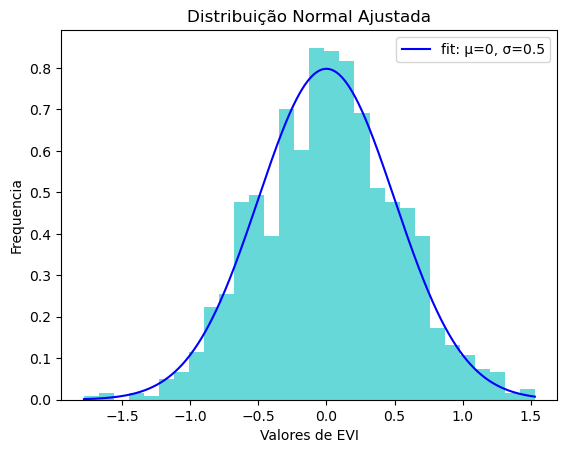

In [2]:
mu = 0
sigma =  0.5
np.random.seed(8)
data = np.random.normal(loc=mu, scale=sigma, size=1100)

#fitagem
x = np.linspace(min(data), max(data), 1100)
pdf = norm.pdf(x, mu, sigma)

#plotagem
plt.hist(data, bins=30, density=True, alpha=0.6, color='c')
plt.plot(x, pdf, 'b-', label=f'fit: μ={mu}, σ={sigma}')
plt.xlabel('Valores de EVI')
plt.ylabel('Frequencia')
plt.title('Distribuição Normal Ajustada')
plt.legend()
plt.show()

###### Sample distribution

envolve analisar uma unica amostra da população

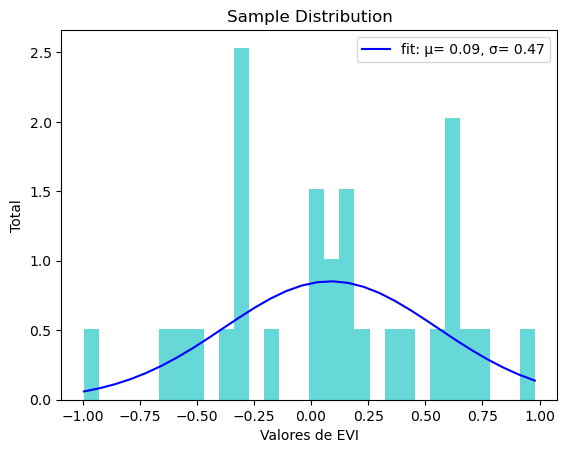

In [ ]:
import random

#erro 01
#code: amostra01 = random.sample(data, 30)
#msg: Population must be a sequence (sorted).

random.seed(38)
amostra01 = random.choices(data, k=30)

#fitar a amostra numa distribuição gaussiana
mu01, sigma01 = norm.fit(amostra01)

#plotagem
x01 = np.linspace(min(amostra01), max(amostra01), 30)
pdf = norm.pdf(x01, mu01, sigma01)

plt.hist(amostra01, bins=30, density=True, alpha=0.6, color='c')
plt.plot(x01, pdf, 'b-', label=f'fit: μ linha ={mu01: .2f}, σ={sigma01: .2f}')
plt.xlabel('Valores de EVI')
plt.ylabel('Total')
plt.title('Sample Distribution')
plt.legend()
plt.show()

1. **diferença bruta entre amostra e população para mu = 0.09 e sigma = 0.42.** Os valores encontrados foram cosideravelmente diferentes, principalmente, de desvio padrão, devido a dispersão entre os valores da amostra.